# Data Analysis

In [15]:
# Imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

In [16]:
df_teams = pd.read_csv('dataset/teams.csv')
df_players = pd.read_csv('dataset/players.csv')
df_coaches = pd.read_csv('dataset/coaches.csv')
df_players_teams = pd.read_csv('dataset/players_teams.csv')
df_awards_players = pd.read_csv('dataset/awards_players.csv')
df_series_post = pd.read_csv('dataset/series_post.csv')
df_teams_post = pd.read_csv('dataset/teams_post.csv')

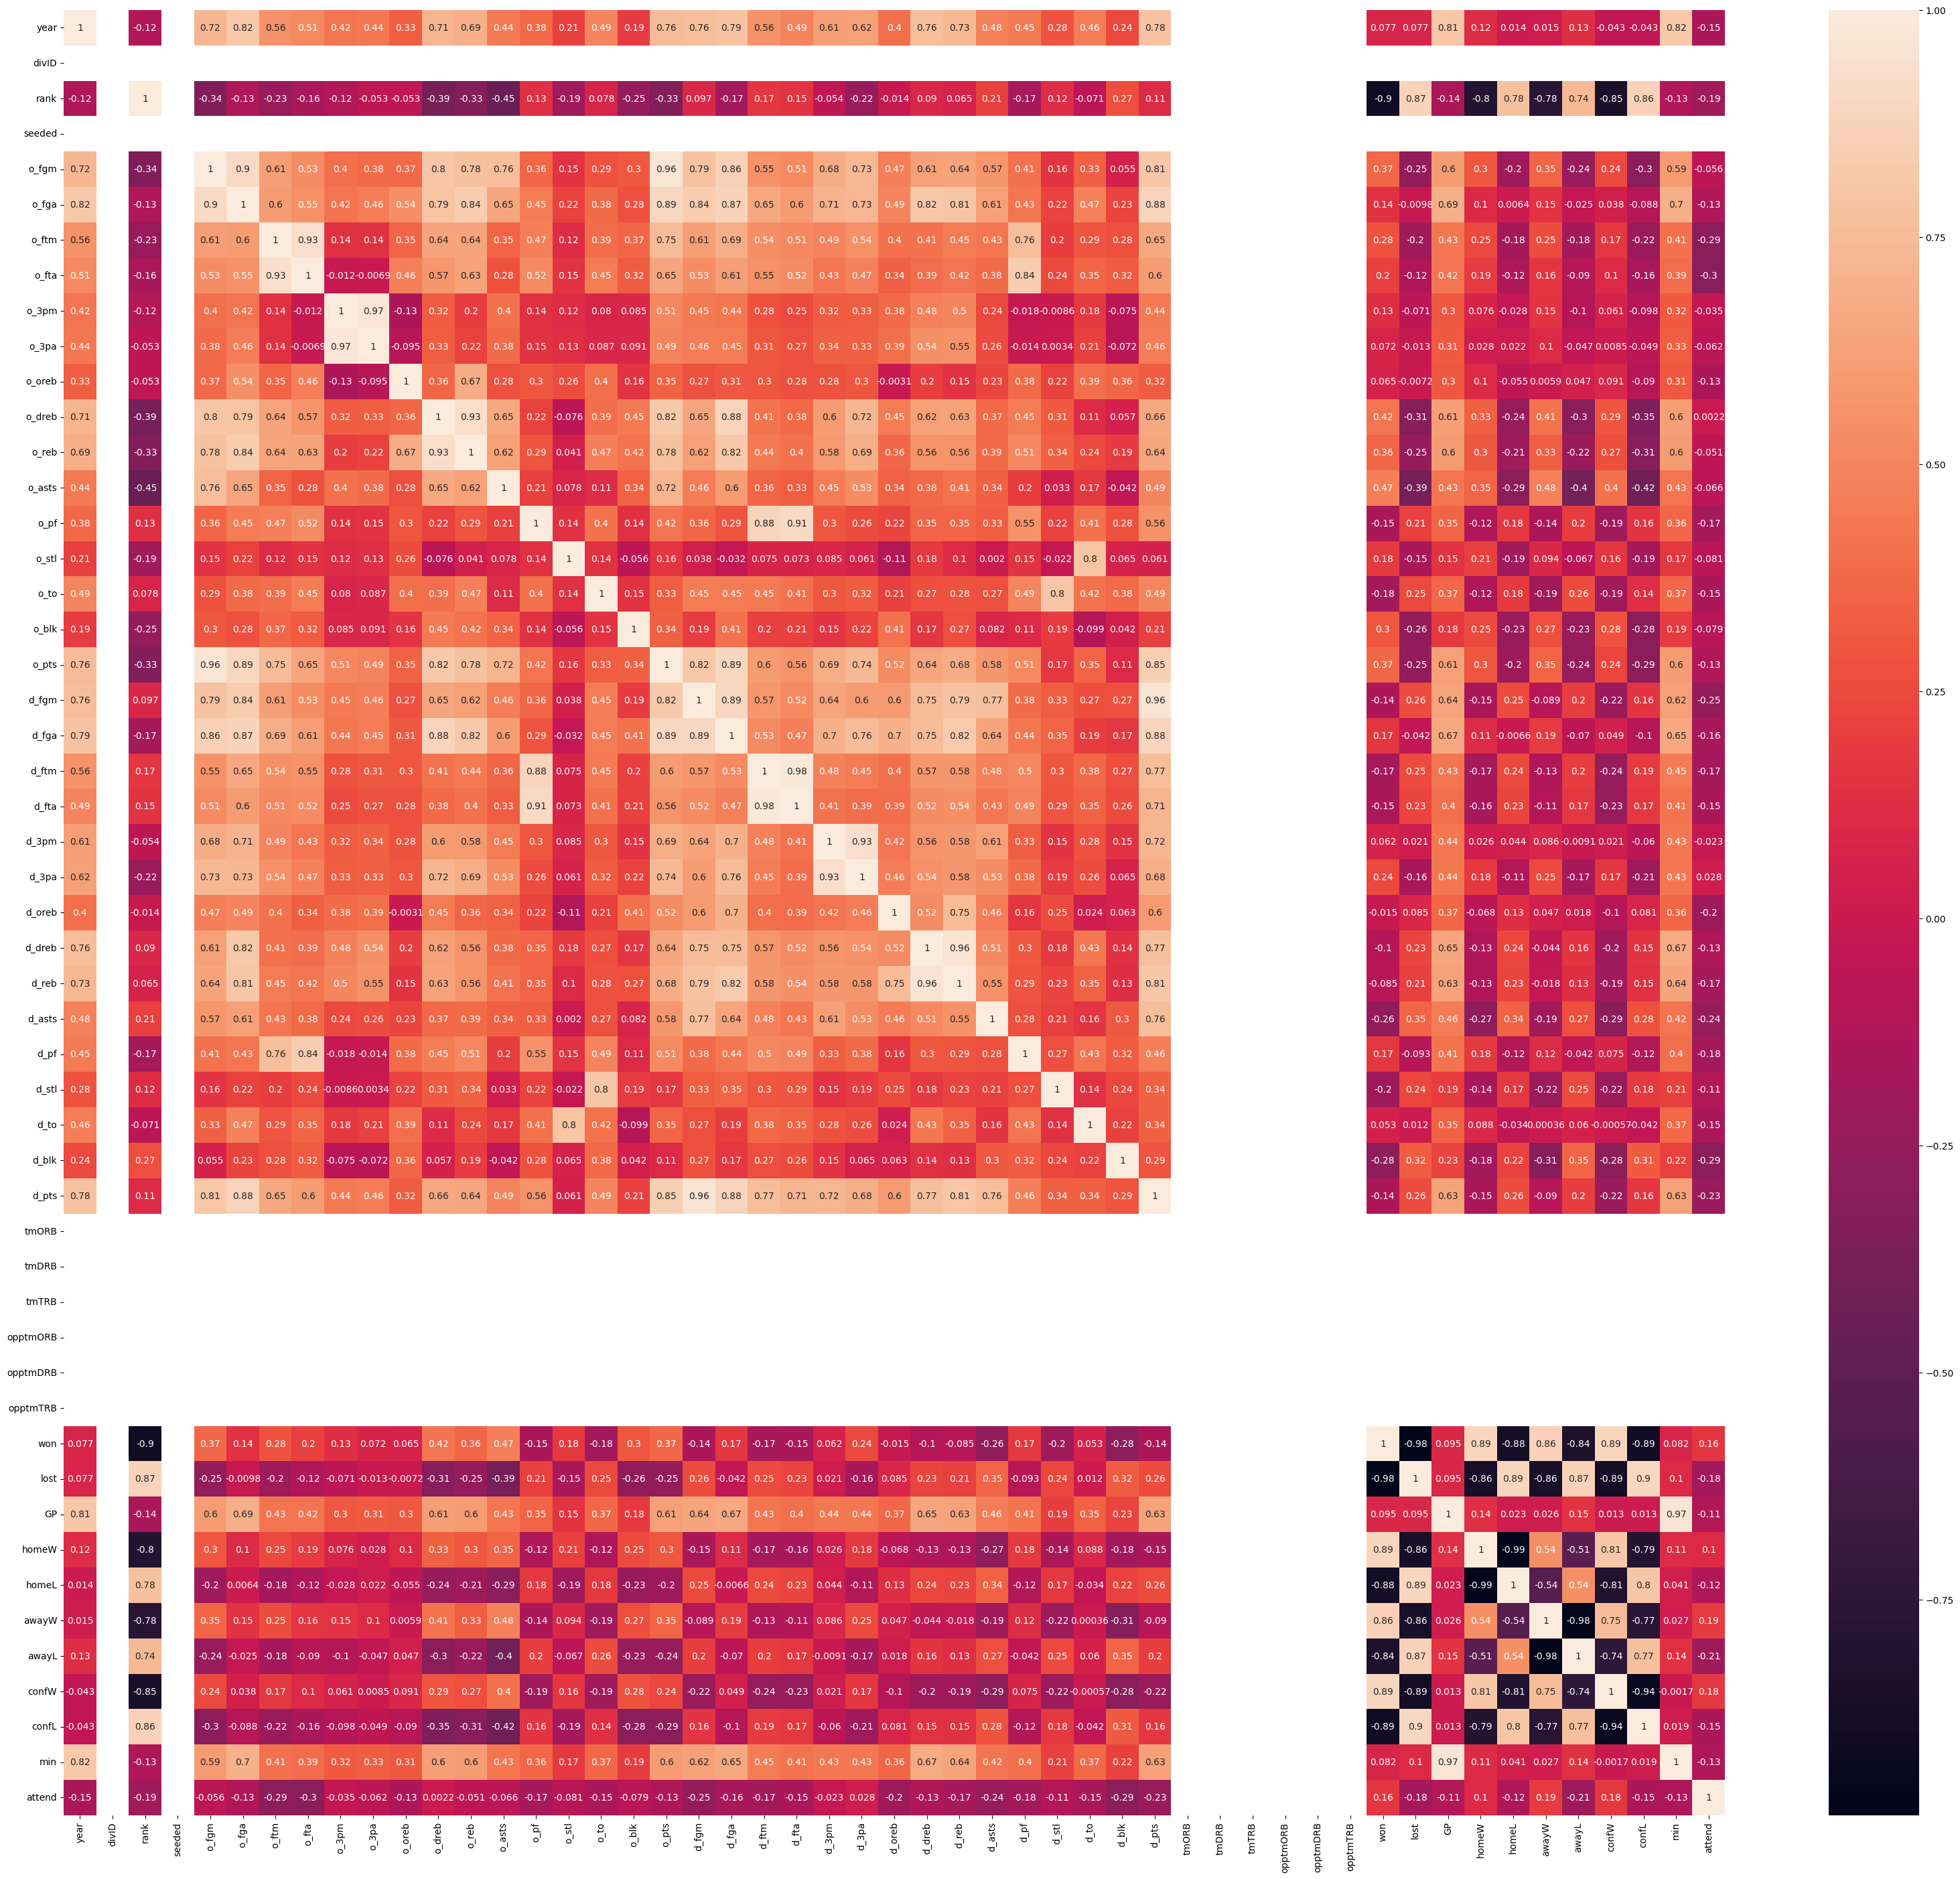

In [17]:
df = df_teams.select_dtypes(exclude=['object'])
correlation_matrix = df.corr()
plt.figure(figsize=(40, 35))
sb.heatmap(correlation_matrix, annot=True)
plt.show()

C:\Users\JoaoCoutinho\AppData\Local\Temp\ipykernel_6608\277561770.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(playoff_counts))


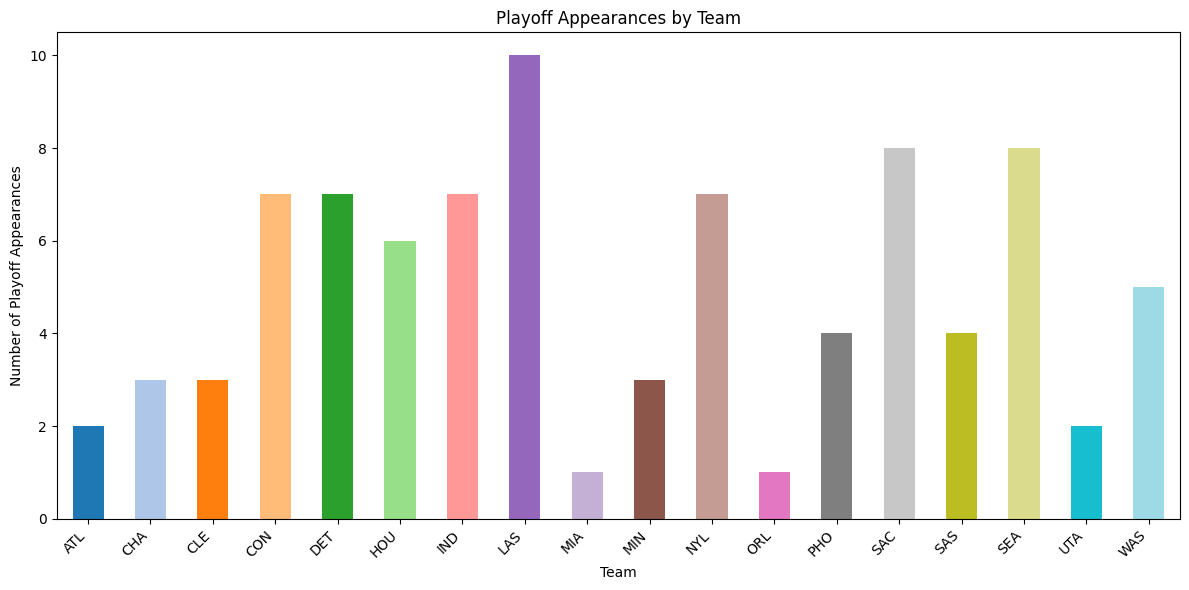

In [18]:
playoffs = df_teams[df_teams['playoff'] == 'Y']
playoff_counts = playoffs.groupby('tmID')['playoff'].count()

colors = plt.cm.get_cmap('tab20', len(playoff_counts))  
plt.figure(figsize=(12, 6)) 
playoff_counts.plot(kind='bar', color=colors(range(len(playoff_counts)))) 

plt.xlabel('Team')
plt.ylabel('Number of Playoff Appearances')
plt.title('Playoff Appearances by Team')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

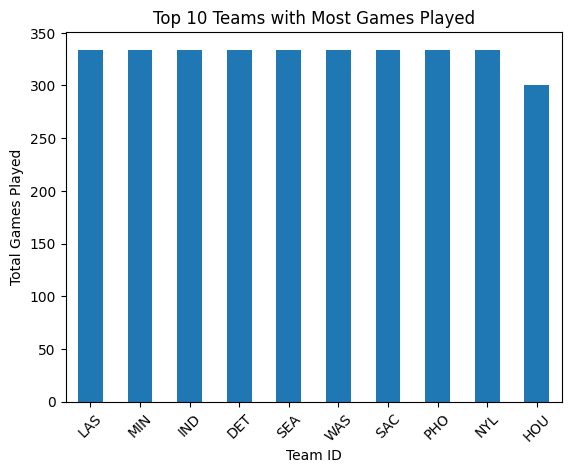

In [19]:
teams_game_num = df_teams.groupby('tmID')['GP'].sum()

teams_game_num.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Team ID')
plt.ylabel('Total Games Played')
plt.title('Top 10 Teams with Most Games Played')
plt.xticks(rotation=45)
plt.show()

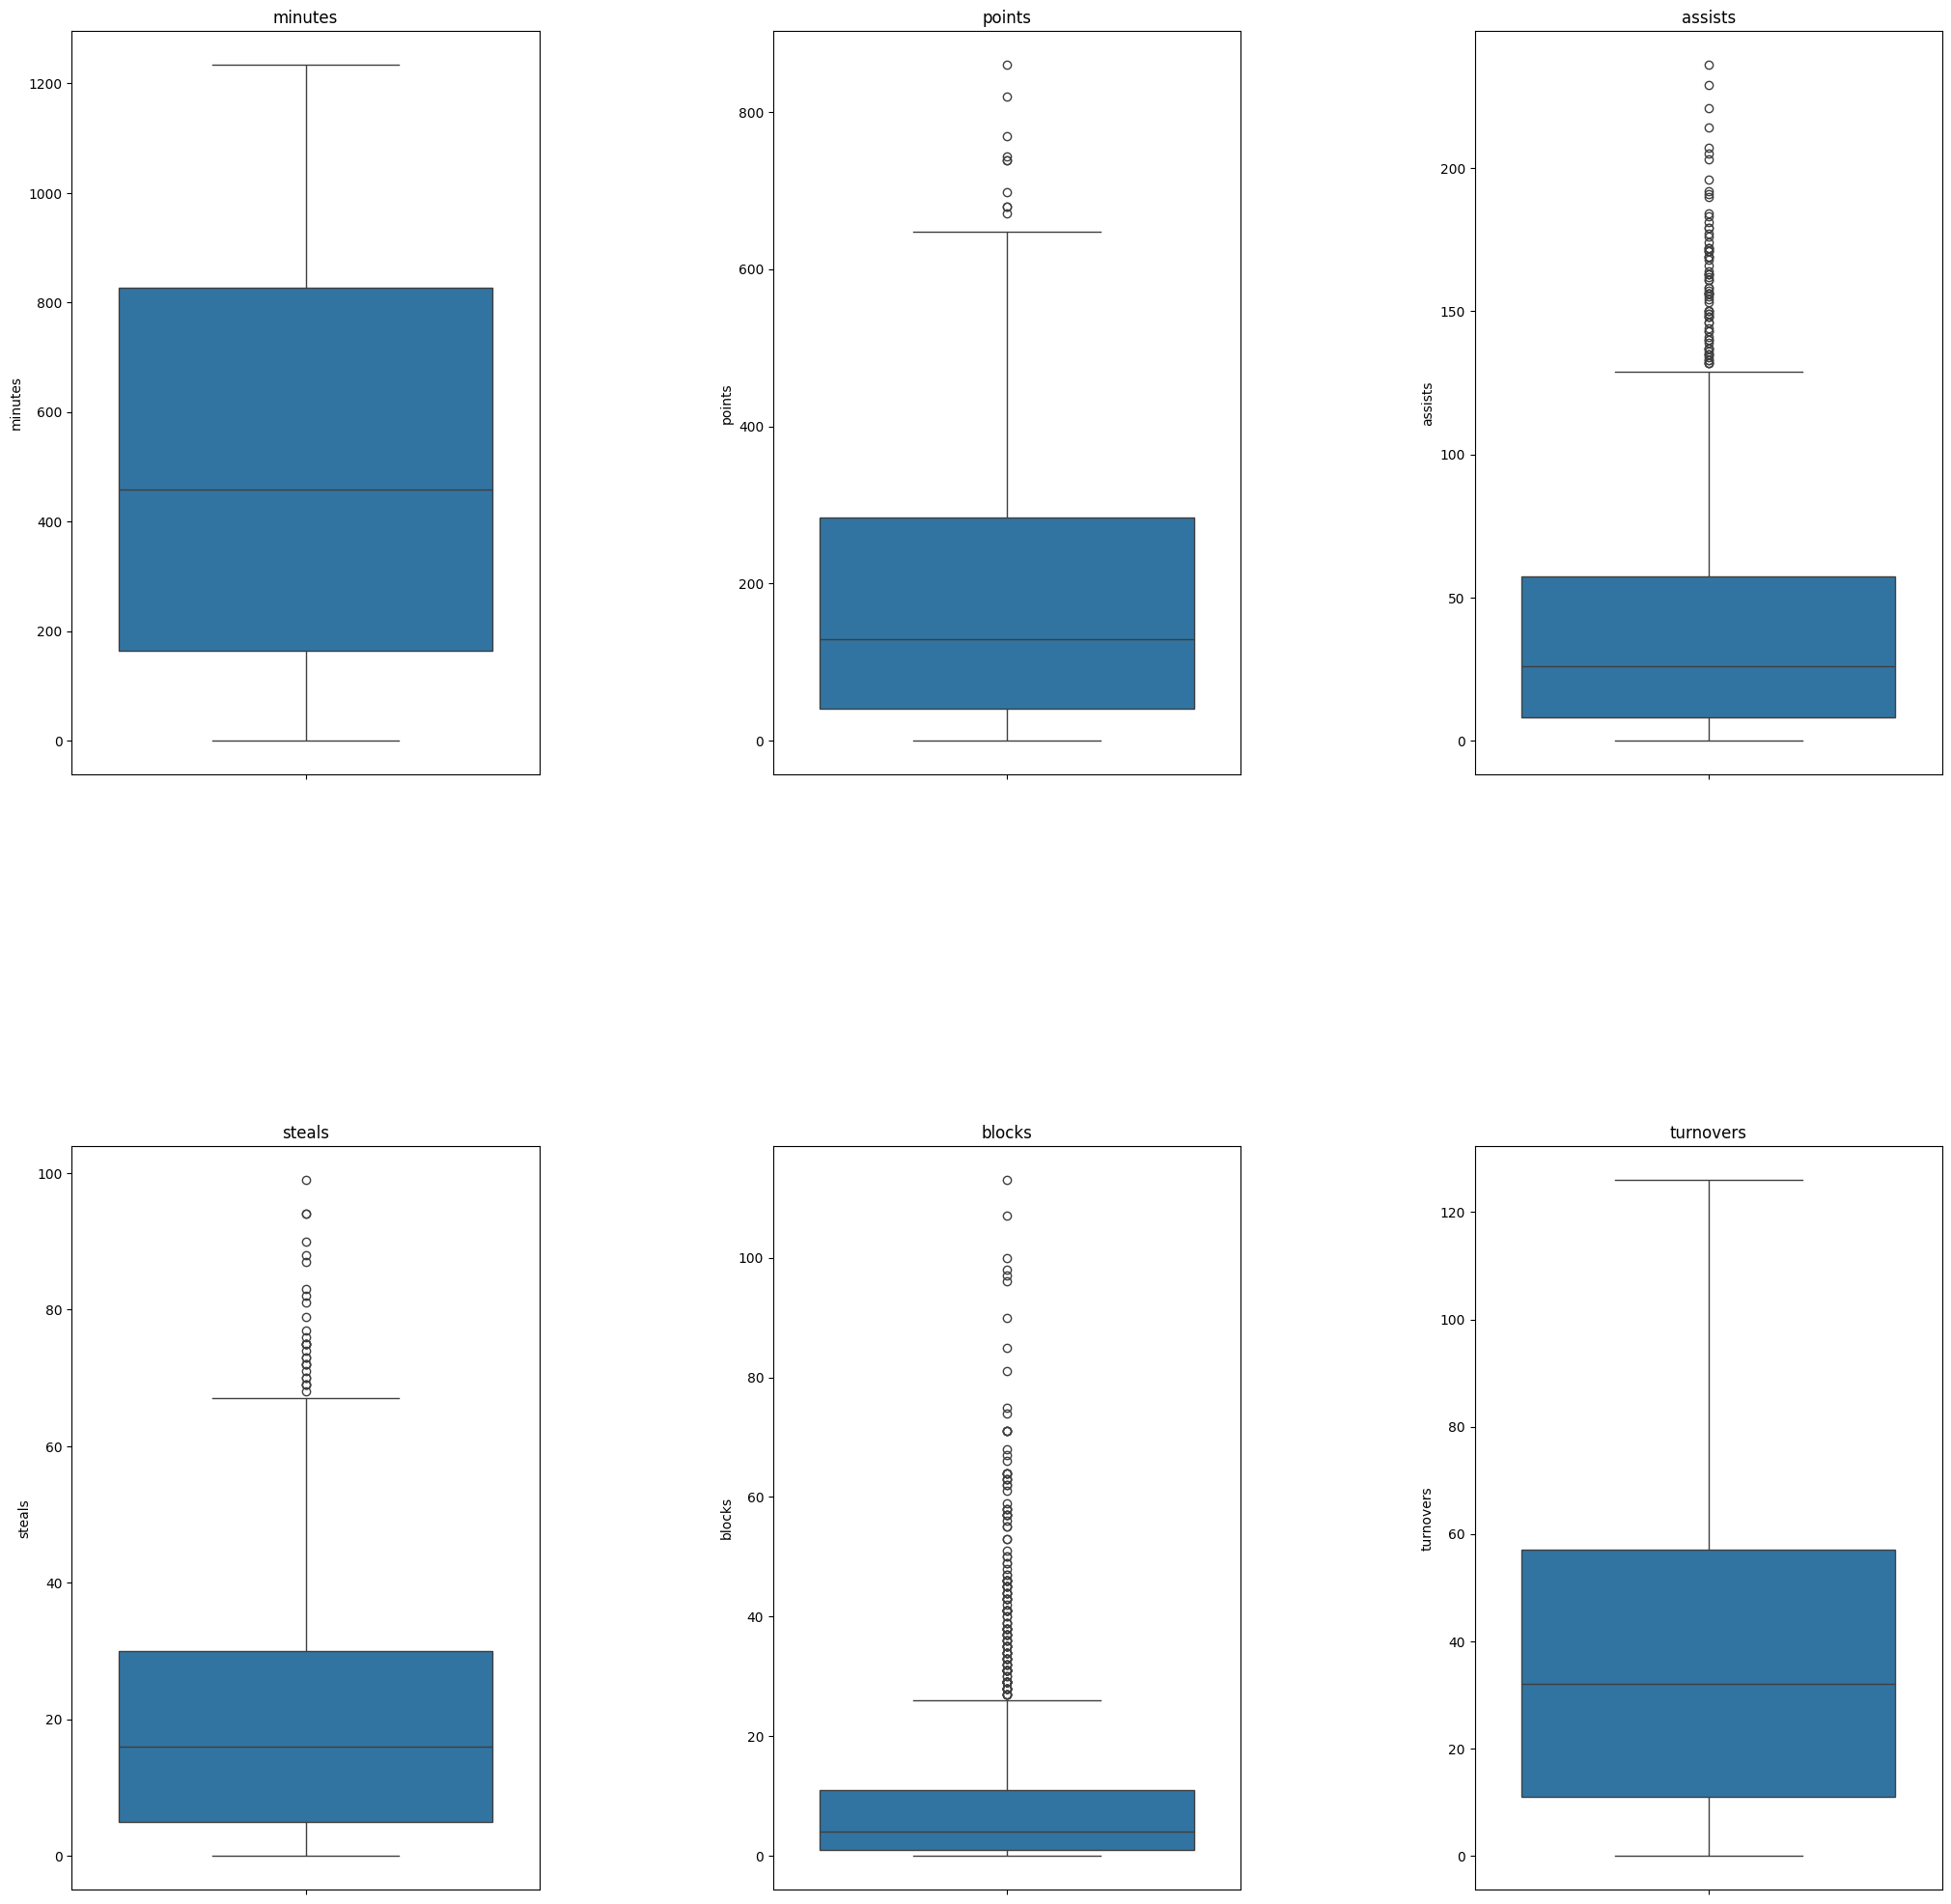

In [20]:
players_stats = df_players_teams[['minutes', 'points', 'assists', 'steals', 'blocks', 'turnovers']]

fig, axes = plt.subplots(2, 3, figsize=(25, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()

for col, axis in zip(players_stats, axes):
    sb.boxplot(data=players_stats[col], ax=axis)
    axis.set_title(col)

for i in range(len(players_stats), len(axes)):
    fig.delaxes(axes[i])

plt.show()

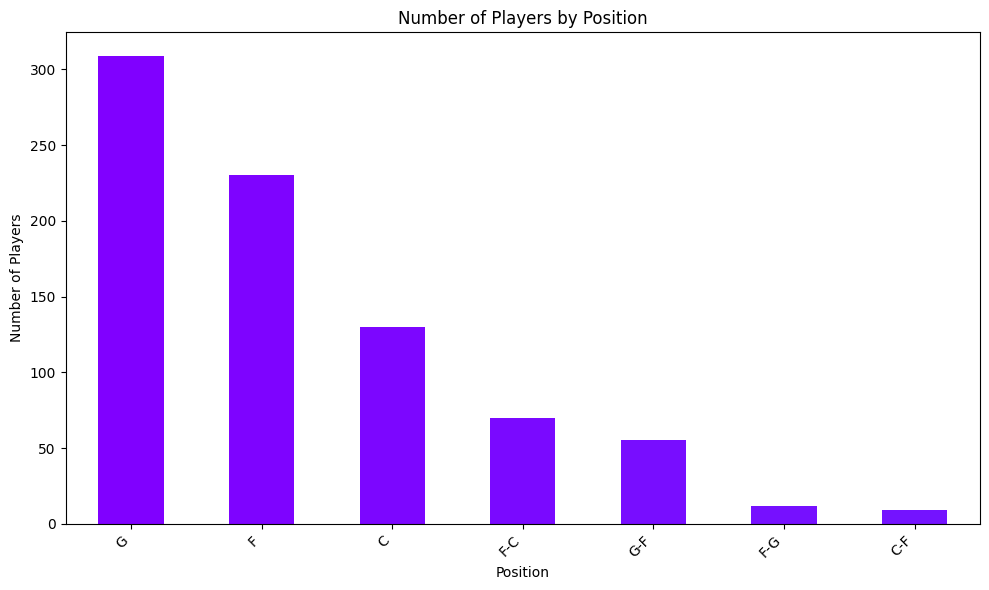

In [21]:
position_counts = df_players['pos'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
position_counts.plot(kind='bar', color=colors(range(len(playoff_counts))))

# Add labels and title
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players by Position')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()
plt.show()